In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
Data=pd.read_excel('Q_tot.xlsx')
Data=Data[Data.index>0]
Data

,Date,Q_tronto,Q_acquifero,Q_Inf+RO+Uro_S (m3/s),Q_tot,DMV,Q disponibile netto DMV,Prelievi concessi (agr+ind+altro),Prelievi idrico civile (nessuna captazione nei confini),Fabbisogni laghi,Fabbisogni Agricolo,Q fabbisogni,Qdisp-Qfabbis,Qdisp-Qfabbis sop dep,Depuratore,Sopperimento,INDICE PRE,INDICE POST,Delta Index
1,2013-01-01,10.558602,0.111806,0.172599,10.843006,5.04,5.803006,0.046061,0,0.025065,0,0.071126,5.73188,5.73188,0.272362,6.004242,0.987743,1.034678,0.047517
2,2013-02-01,12.402228,0.111806,0.091501,12.605535,5.81,6.795535,0.046061,0,0.031971,0,0.078032,6.717502,6.717502,0.319793,7.037295,0.988517,1.035576,0.047606
3,2013-03-01,20.725274,0.111806,0.089651,20.926731,5.81,15.116731,0.046061,0,0.027449,0,0.073511,15.04322,15.04322,0.379235,15.422455,0.995137,1.020224,0.025210
4,2013-04-01,22.933217,0.111806,0,23.045023,5.04,18.005023,0.046061,0,0.034119,0.059193,0.139373,17.865649,17.865649,0.335526,18.201175,0.992259,1.010894,0.018780
5,2013-05-01,15.196393,0.111806,0,15.308199,5.04,10.268199,0.046061,0,0.025456,0.057284,0.128801,10.139398,10.139398,0.341316,10.480714,0.987456,1.020696,0.033662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,2023-08-01,11.099289,0.111806,0,11.211094,3.87,7.341094,0.046061,0,NaN,0.057284,0.103345,7.237749,7.237749,0.101081,7.33883,0.985922,0.999692,0.013966
129,2023-09-01,9.336245,0.111806,0,9.448051,3.87,5.578051,0.046061,0,NaN,0.059193,0.105255,5.472796,5.472796,0.148269,5.621066,0.981131,1.007711,0.027092
130,2023-10-01,9.198069,0.111806,0,9.309874,3.87,5.439874,0.046061,0,NaN,0,0.046061,5.393813,5.393813,0.144023,5.537836,0.991533,1.018008,0.026702
131,2023-11-01,9.42106,0.111806,0,9.532865,5.04,4.492865,0.046061,0,NaN,0,0.046061,4.446804,4.446804,0.120249,4.567053,0.989748,1.016512,0.027042


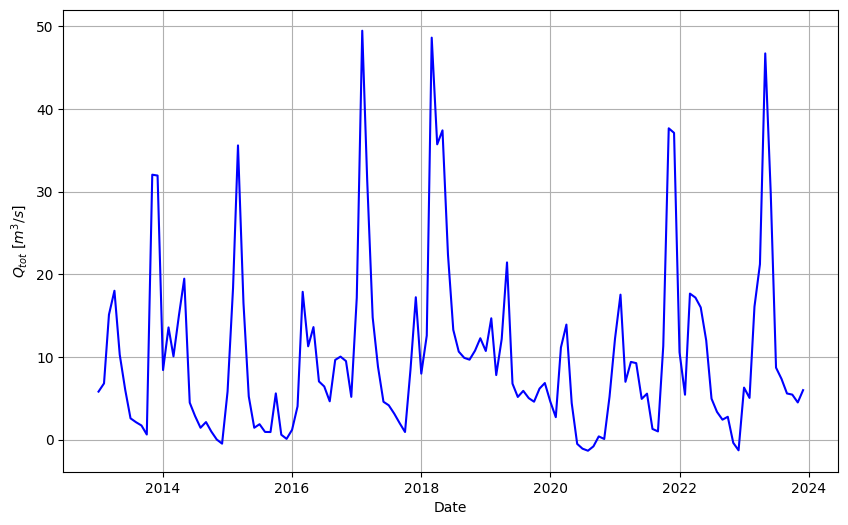

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(Data['Date'], Data['Q disponibile netto DMV'], label='Available Water', color='blue')  # Parte nota
#plt.title('Availabe Water')
plt.xlabel('Date')
plt.ylabel('$Q_{tot}$ [$m^3/s$]')
#plt.legend()
plt.grid()
plt.show()

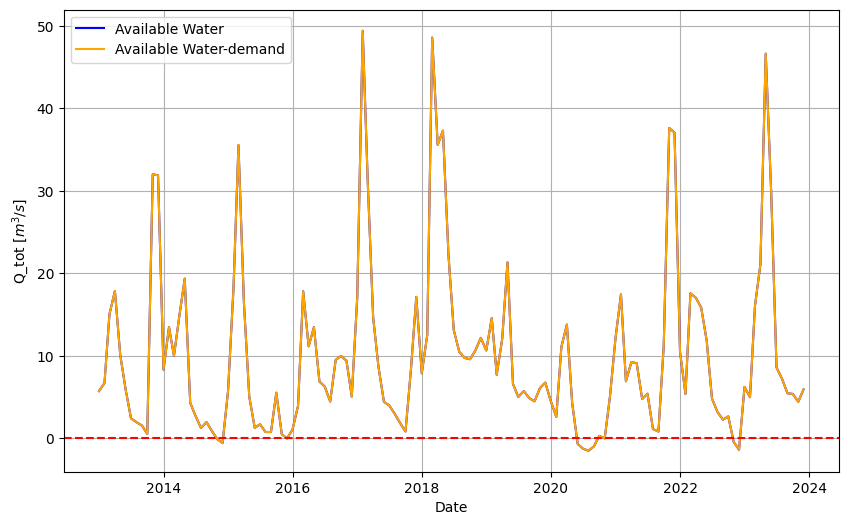

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(Data['Date'], Data['Qdisp-Qfabbis'], label='Available Water', color='blue')  
plt.plot(Data['Date'], Data['Qdisp-Qfabbis sop dep'], label='Available Water-demand', color='orange')  
plt.axhline(y=0, color='red', linestyle='--')  # Vertical Line
#plt.title('Availabe Water')
plt.xlabel('Date')
plt.ylabel('Q_tot [$m^3/s$]')
plt.legend()
plt.grid()
plt.show()

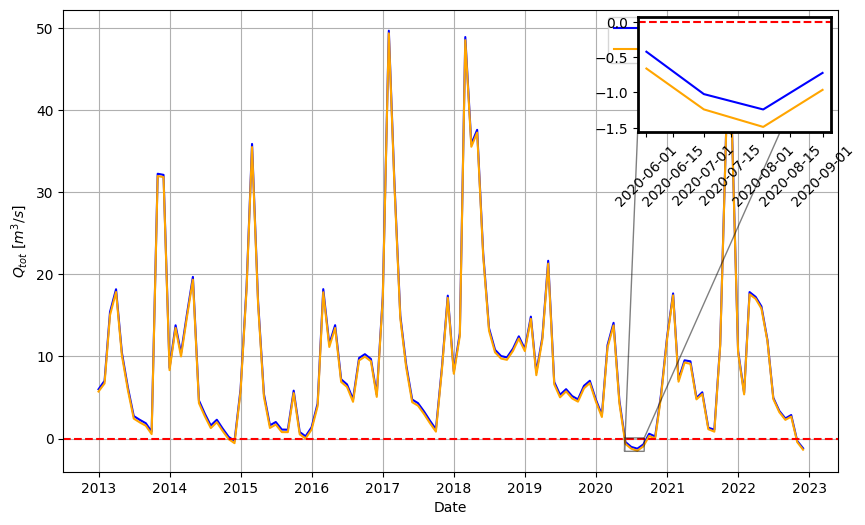

In [5]:
# Define the time interval for the zoom
start_date_zoom = '2020-05-31'
end_date_zoom = '2020-09-30'

# Filter the dataset for the full period and the zoom period
mask_full = (Data['Date'] >= '2013-01-01') & (Data['Date'] <= '2022-12-31')
Data_full = Data[mask_full]

mask_zoom = (Data['Date'] >= start_date_zoom) & (Data['Date'] <= end_date_zoom)
Data_zoom = Data[mask_zoom]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Data_full['Date'], Data_full['Sopperimento'], label='Available Water', color='blue')
ax.plot(Data_full['Date'], Data_full['Qdisp-Qfabbis sop dep'], label='Available Water–demand', color='orange')
ax.axhline(y=0, color='red', linestyle='--')

# Create the zoom (inset)
axins = inset_axes(ax, width="25%", height="25%", loc="upper right")
axins.plot(Data_zoom['Date'], Data_zoom['Sopperimento'], color='blue')
axins.plot(Data_zoom['Date'], Data_zoom['Qdisp-Qfabbis sop dep'], color='orange')
axins.axhline(y=0, color='red', linestyle='--')

# Customize the zoom inset border
for spine in axins.spines.values():
    spine.set_edgecolor("black")  # Border color
    spine.set_linewidth(2)        # Border thickness

# Rotate dates on the zoom x-axis
axins.tick_params(axis="x", rotation=45)

# Add a rectangle to highlight the zoomed area in the main plot
ax.indicate_inset_zoom(axins, edgecolor="black")

# Customize the main plot
ax.set_xlabel('Date')
ax.set_ylabel(r'$Q_{tot}$ [$m^3/s$]')
ax.legend()
ax.grid()

plt.show()


In [6]:
Data['Date'] = pd.to_datetime(Data['Date'])

# Extract only the month number (1 = January, 2 = February, ..., 12 = December)
Data['Month'] = Data['Date'].dt.month

# Compute mean, standard deviation, minimum, and maximum for each month
# by aggregating across all years
monthly_stats = Data.groupby('Month')['Qdisp-Qfabbis sop dep'].agg(['mean', 'std', 'min', 'max'])

# Display the results
print(monthly_stats)
monthly_stats.to_excel('dati.xlsx')


            mean        std       min        max
Month                                           
1       8.177838   4.318217  1.098965  17.118743
2      13.581592  13.125566   2.62469  49.397533
3      19.786305  13.176514  6.927772  48.569891
4      16.708365   7.076324  9.261853  35.570329
5      17.383956  13.445832  4.281796  46.618753
6       8.853397   9.203775 -0.660521  29.746777
7       4.810291   3.783728  -1.23956   13.13581
8       3.439042   3.383393  -1.48787  10.502619
9       3.449632   3.545842 -0.962888   9.749285
10      4.687115   4.077601  0.311069  11.273136
11      9.881565  13.024047 -0.440295  37.614041
12     10.838927  12.937404 -1.362257  37.044416


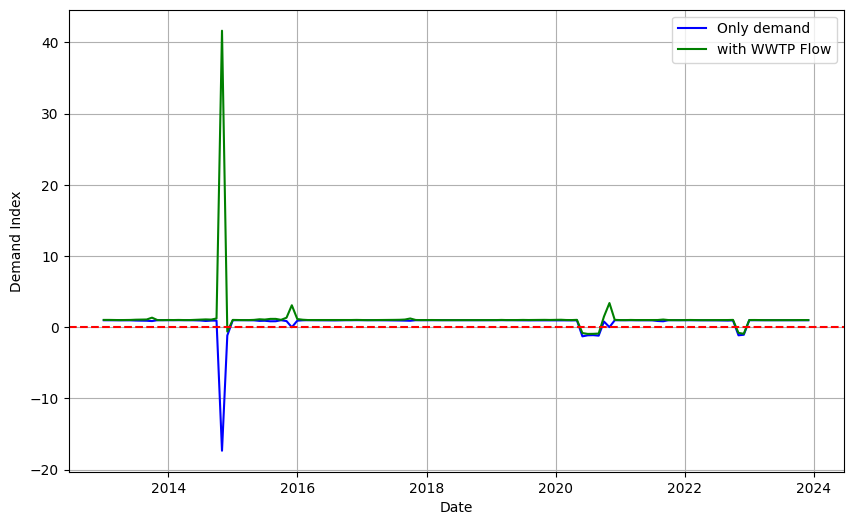

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(Data['Date'], Data['INDICE PRE'], label='Only demand', color='blue') 
plt.plot(Data['Date'], Data['INDICE POST'], label='with WWTP Flow', color='green') 
plt.axhline(y=0, color='red', linestyle='--')  
#plt.title('Availabe Water')
plt.xlabel('Date')
plt.ylabel('Demand Index')
plt.legend()
plt.grid()
plt.show()